# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries


In [3]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
! kaggle datasets download archit9406/customer-transaction-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [8]:
! unzip customer-transaction-dataset

unzip:  cannot find or open customer-transaction-dataset, customer-transaction-dataset.zip or customer-transaction-dataset.ZIP.


# libarary 

In [9]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

#import missingno as msno
#from textwrap import wrap

# Data loading and cleaning

In [10]:
# Loading dataset
transaction_df = pd.read_excel('/content/drive/MyDrive/KPMG_VI_New_raw_data_update_final.xlsx','Transactions')

In [11]:
# View data
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [12]:
transaction_df.columns = transaction_df.iloc[0]
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [13]:
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)

In [14]:
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [15]:
transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [16]:
# change variable types
transaction_df["transaction_id"] = pd.to_numeric(transaction_df["transaction_id"])
transaction_df["customer_id"] = pd.to_numeric(transaction_df["customer_id"])
transaction_df["list_price"] = pd.to_numeric(transaction_df["list_price"])
transaction_df["standard_cost"] = pd.to_numeric(transaction_df["standard_cost"])
transaction_df["product_id"] = pd.to_numeric(transaction_df["product_id"])
transaction_df["transaction_date"] = pd.to_datetime(transaction_df["transaction_date"])

In [17]:
# Univariable Analysis
def unistats(df):
  output_df = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Mean', 'Mode','Min','Median','Max','Std','Skew','Kurt'])
  
  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      output_df.loc[col] = [df[col].count(), df[col].isnull().sum(),df[col].nunique(),df[col].dtype,df[col].mean(),
                            df[col].mode().values[0],df[col].min(),df[col].median(),df[col].max(),df[col].std(),df[col].skew(),df[col].kurt()]
    else:
      output_df.loc[col] = [df[col].count(), df[col].isnull().sum(),df[col].nunique(),df[col].dtype,'-',df[col].mode().values[0],
                            '-','-','-','-','-','-']
  
  return output_df.sort_values(by=['Dtype','Unique'],ascending=False)

unistats(transaction_df)

,Count,Missing,Unique,Dtype,Mean,Mode,Min,Median,Max,Std,Skew,Kurt
product_first_sold_date,19803,197,100,object,-,33879,-,-,-,-,-,-
brand,19803,197,6,object,-,Solex,-,-,-,-,-,-
product_line,19803,197,4,object,-,Standard,-,-,-,-,-,-
product_class,19803,197,3,object,-,medium,-,-,-,-,-,-
product_size,19803,197,3,object,-,medium,-,-,-,-,-,-
online_order,19640,360,2,object,-,True,-,-,-,-,-,-
order_status,20000,0,2,object,-,Approved,-,-,-,-,-,-
list_price,20000,0,296,float64,1107.829449,2091.47,12.01,1163.89,2091.47,582.825242,-0.125804,-1.083232
standard_cost,19803,197,103,float64,556.046951,388.92,7.21,507.58,1759.85,405.95566,0.864142,0.287088
transaction_date,20000,0,364,datetime64[ns],-,2017-02-14 00:00:00,-,-,-,-,-,-


In [18]:
# check duplications:
transaction_df.duplicated().sum()

0

In [19]:
# check unique values:
transaction_df.nunique()
transaction_df['online_order'].unique()

array([False, True, nan], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


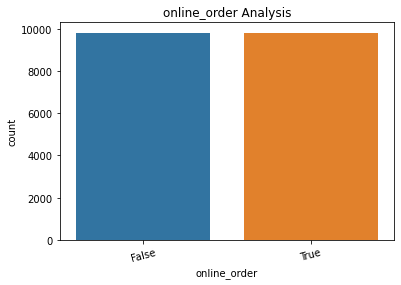

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


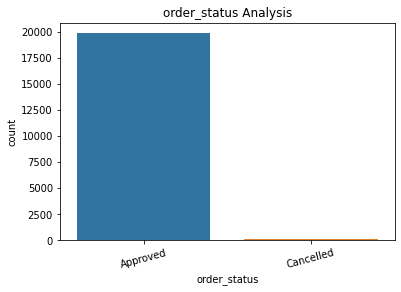

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


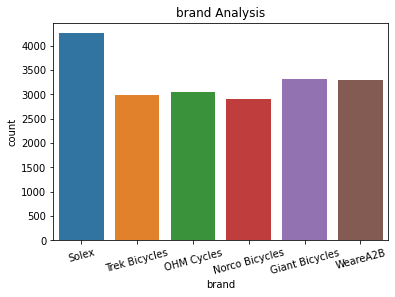

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


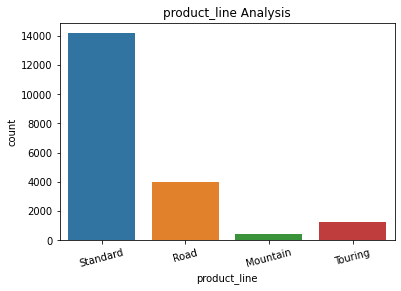

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


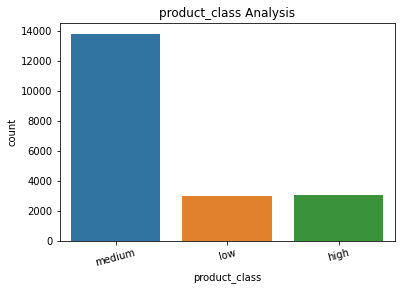

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


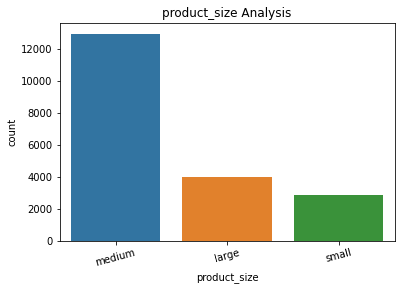

In [20]:
# Visualize the counts
for col in transaction_df:
  if transaction_df[col].nunique() <= 7:
    sns.countplot(transaction_df[col])
    plt.xticks(rotation=15)
    plt.title(f'{col} Analysis')
    plt.show()



## Data Cleaning - Checking and working with missing value

In [21]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [22]:
 # group by -> count
transaction_df['product_line'].value_counts().index[0]

'Standard'

In [23]:
# Categery variables' missing value
print(transaction_df.info())
for col in transaction_df.columns:
    # Check if the column is of object type
    if transaction_df[col].dtypes == 'object':
        # Impute with the most frequent value
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### numerical variables

In [24]:
# Inspect missing values in the dataset
print(transaction_df.isnull().values.sum())
# Replace the ' 's with NaN
transaction_df = transaction_df.replace(" ",np.NaN)
# Impute the missing values with mean imputation
for col in transaction_df.columns:
  if transaction_df[col].dtypes != 'object':
    transaction_df = transaction_df.fillna(transaction_df.mean())
# Count the number of NaNs in the dataset to verify
print(transaction_df.isnull().values.sum())

197


<ipython-input-24-8237da50e2e8>:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  transaction_df = transaction_df.fillna(transaction_df.mean())
<ipython-input-24-8237da50e2e8>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  transaction_df = transaction_df.fillna(transaction_df.mean())


0


###Here, we can see that we have 1542 null values. Which we treated with mean as well as most frequent values as per datatype. Now, as we have completed our data cleaning and understanding, now we will commence the Cohort Analysis.

In [25]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

# Assigned the cohorts and calculated the monthly offset

In [26]:
# get the transaction month
transaction_df['TransactionMonth'] = transaction_df['transaction_date'].dt.to_period('M') 
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,2017-08
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,2017-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823,2017-06
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560,2017-11
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410,2017-04
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216,2017-07


In [27]:
# get the cohort month
transaction_df['CohortMonth'] = transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')
transaction_df.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823,2017-06,2017-01
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560,2017-11,2017-01
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410,2017-04,2017-04
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216,2017-07,2017-02
20000,20000,11,1144,2017-09-22,True,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334,2017-09,2017-03


## Calculating time offset in Month as Cohort Index

Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [28]:
# create a date element function to get a series for subtraction
def get_date_elements(df, column):
  month = df[column].dt.month
  year = df[column].dt.year
  return month, year

In [29]:
# get date element for our cohort and invoice columns
Tran_month, Tran_year = get_date_elements(transaction_df,'TransactionMonth')
Cohort_month, Cohort_year = get_date_elements(transaction_df,'CohortMonth')

Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate. 

In [30]:
# calculate the month difference
year_diff = Tran_year - Cohort_year
month_diff = Tran_month - Cohort_month
transaction_df['CohortIndex']= year_diff * 12 + month_diff + 1 
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02,2017-02,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05,2017-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10,2017-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,2017-08,2017-02,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,2017-10,2017-01,10



Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.

Then, we call this object, select the customer_id column and calculate the average.

Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

Finally, we create a pivot table bypassing

 -  CohortMonth to the index parameter,
 - CohortIndex to the columns parameter,
 - customer_id to the values parameter.

In [31]:
cohort_data = transaction_df.groupby(['CohortMonth','CohortIndex'])['customer_id'].nunique()
cohort_data = cohort_data.reset_index()
cohort_data = cohort_data.rename({'customer_id': 'Customer_Number'}, axis=1)
cohort_data

,CohortMonth,CohortIndex,Customer_Number
0,2017-01,1,1354
1,2017-01,2,486
2,2017-01,3,508
3,2017-01,4,509
4,2017-01,5,502
...,...,...,...
73,2017-10,2,6
74,2017-10,3,8
75,2017-11,1,13
76,2017-11,2,5


# Calculate business metrics: Retention rate

**The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.**

In this section, we will calculate the retention count for each cohort Month paired with cohort Index

Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.

We will create a pivot table for this purpose.

In [32]:
# create a pivot table
cohort_table = cohort_data.pivot(index='CohortMonth',columns=['CohortIndex'],values='Customer_Number')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01,1.0,0.358936,0.375185,0.375923,0.370753,0.356721,0.382570,0.390694,0.369276,0.392171,0.367061,0.381093
2017-02,1.0,0.406250,0.372500,0.391250,0.360000,0.372500,0.385000,0.351250,0.411250,0.385000,0.370000,NaN
2017-03,1.0,0.345041,0.359504,0.345041,0.376033,0.380165,0.355372,0.438017,0.390496,0.373967,NaN,NaN
2017-04,1.0,0.330357,0.360119,0.455357,0.425595,0.360119,0.422619,0.375000,0.392857,NaN,NaN,NaN
2017-05,1.0,0.404762,0.385714,0.414286,0.338095,0.352381,0.347619,0.385714,NaN,NaN,NaN,NaN
2017-06,1.0,0.368852,0.360656,0.385246,0.377049,0.377049,0.434426,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.337662,0.376623,0.415584,0.480519,0.311688,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.372549,0.411765,0.333333,0.254902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.304348,0.304348,0.391304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

Index value represents the Cohort
Columns represent the number of months since the current Cohort
For instance: The value at CohortMonth 2017-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 3rd Month.
Also, you can see from the retention Rate DataFrame:

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

#Visualizing the retention rate
# Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

<function matplotlib.pyplot.show(*args, **kw)>

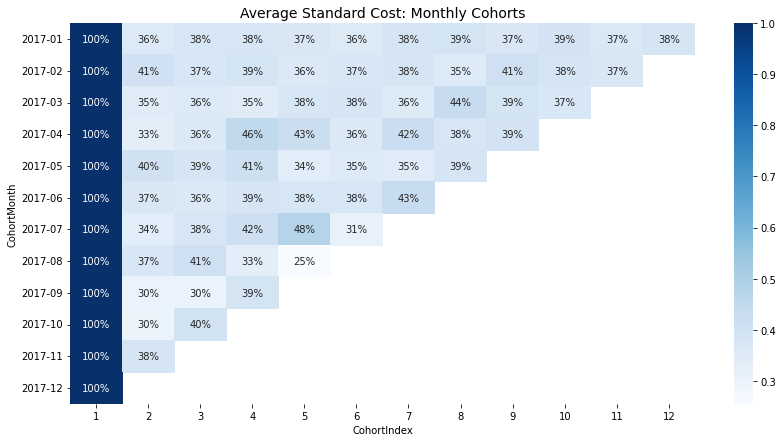

In [34]:
new_cohort_table.index = cohort_table.index.strftime('%Y-%m')
plt.figure(figsize=(14,7))
sns.heatmap(new_cohort_table, annot=True,cmap='Blues',fmt='.0%')
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
plt.yticks( rotation='360')
plt.show

## Interpreting the retention rate
The most effective way to visualize and analyze cohort analysis data is through a heatmap, as we did above. It provides both the actual metric values and the color-coding to see the differences in the numbers visually.

1, Analyze category variables for 2017-04 

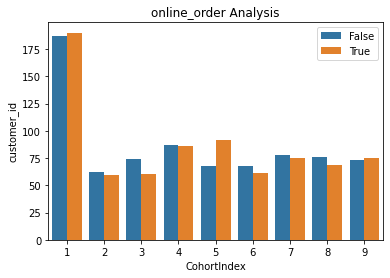

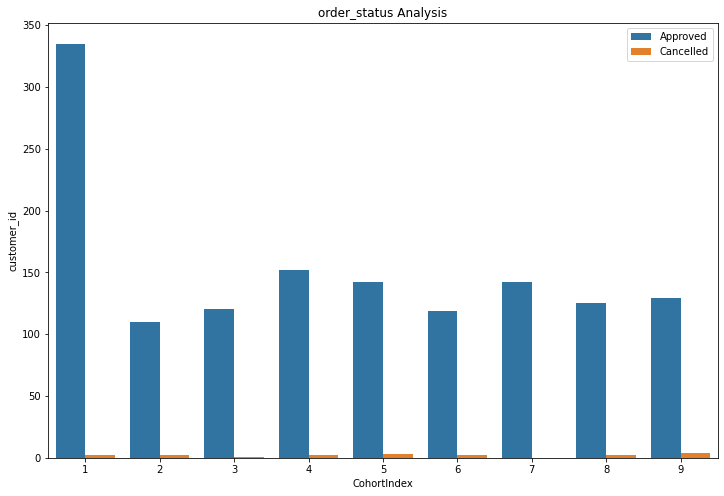

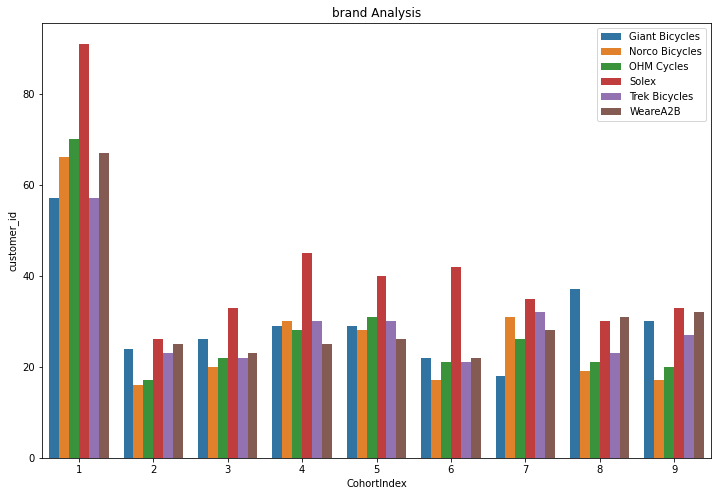

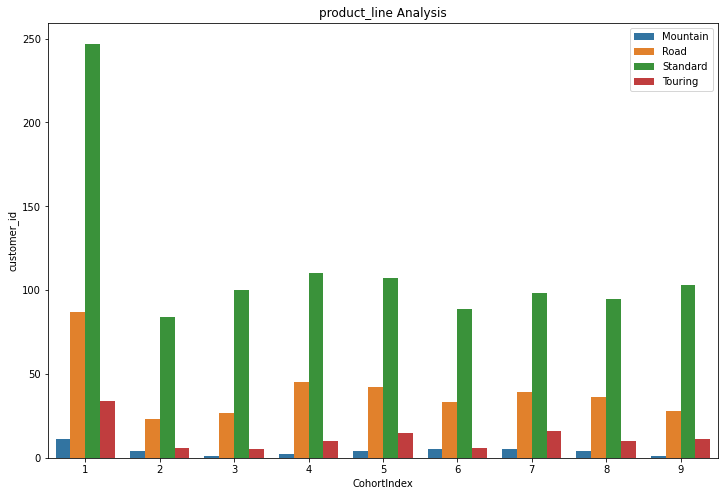

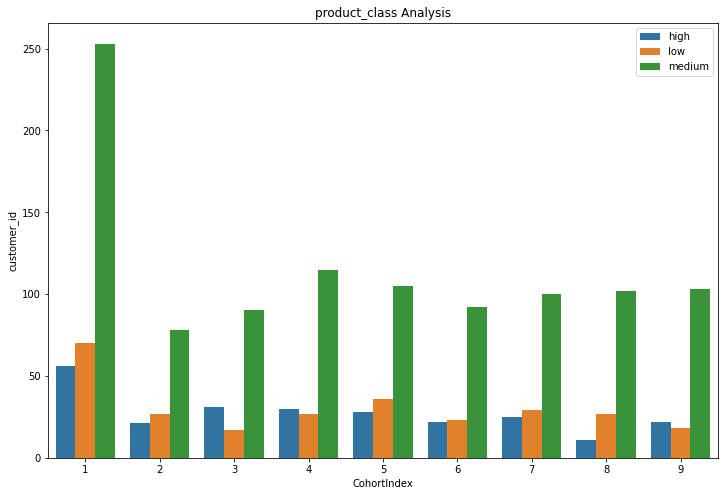

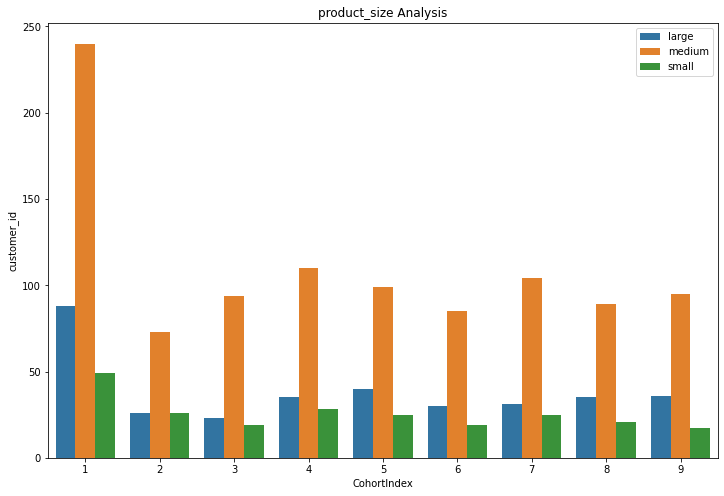

<Figure size 864x576 with 0 Axes>

In [35]:
for col in transaction_df:
  if transaction_df[col].nunique() <= 7:
    cohort_data = transaction_df.groupby(['CohortMonth','CohortIndex',col])['customer_id'].nunique()
    cohort_data = cohort_data.reset_index()
    cohort_2017_04 = cohort_data[cohort_data['CohortMonth']=='2017-04']
    sns.barplot(x='CohortIndex', y = 'customer_id', data=cohort_2017_04, hue = col)
    plt.title(f'{col} Analysis')
    plt.legend()
    plt.figure(figsize=(12,8))
    plt.show

Text(0.5, 1.0, 'List Price Analysis')

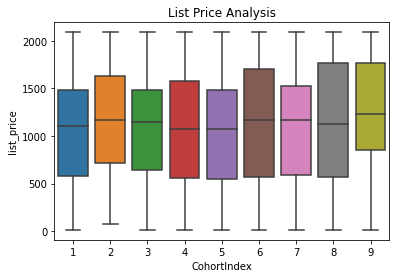

In [36]:
# Analyze the numerical variable in 2017-04
data_2017_4 = transaction_df[transaction_df['CohortMonth']=='2017-04']
sns.boxplot(x='CohortIndex', y = 'list_price', data= data_2017_4)
plt.title('List Price Analysis')

2, Analyze data with Customer data

In [37]:
customer_dmg_df = pd.read_excel('/content/drive/MyDrive/KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
customer_dmg_df.head(5)

<ipython-input-37-40f6bea17e19>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  customer_dmg_df = pd.read_excel('/content/drive/MyDrive/KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')


,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaT,123.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaT,123.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaT,123.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaT,123.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [38]:
# left join transaction data and customer data
combine_data = transaction_df.merge(customer_dmg_df, on='customer_id', how='left')
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  int64         
 1   product_id                           20000 non-null  int64         
 2   customer_id                          20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20000 non-null  bool          
 5   order_status                         20000 non-null  object        
 6   brand                                20000 non-null  object        
 7   product_line                         20000 non-null  object        
 8   product_class                        20000 non-null  object        
 9   product_size                         20000 non-null  object        
 10  list_price

In [39]:
# There are only 3 missing value for column gender, so just drop them
clear_data = combine_data.dropna(subset = ['gender'])

# Replace age=123 by the mean age
clear_data['age']=clear_data['age'].replace(123, clear_data['age'].mean())

# Replace age null value by the mean age
clear_data['age'] = clear_data['age'].fillna(clear_data['age'].mean())
clear_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  int64         
 1   product_id                           19997 non-null  int64         
 2   customer_id                          19997 non-null  int64         
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19997 non-null  bool          
 5   order_status                         19997 non-null  object        
 6   brand                                19997 non-null  object        
 7   product_line                         19997 non-null  object        
 8   product_class                        19997 non-null  object        
 9   product_size                         19997 non-null  object        
 10  list_price

<ipython-input-39-d4be742b50fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_data['age']=clear_data['age'].replace(123, clear_data['age'].mean())
<ipython-input-39-d4be742b50fb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_data['age'] = clear_data['age'].fillna(clear_data['age'].mean())


<function matplotlib.pyplot.show(*args, **kw)>

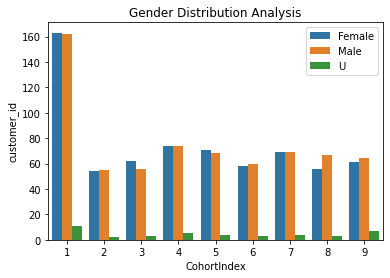

<Figure size 2160x1800 with 0 Axes>

In [40]:
# Analyze the gender for 2017-04
cohort_alldata = clear_data.groupby(['CohortMonth','CohortIndex','gender'])['customer_id'].nunique()
cohort_alldata = cohort_alldata.reset_index()
cohort_2017_04 = cohort_alldata[cohort_alldata['CohortMonth']=='2017-04']
sns.barplot(x='CohortIndex', y = 'customer_id', data=cohort_2017_04, hue = 'gender')
plt.title("Gender Distribution Analysis")
plt.legend()
plt.figure(figsize=(30,25))
plt.show

Text(0.5, 1.0, 'Age distribution Analysis')

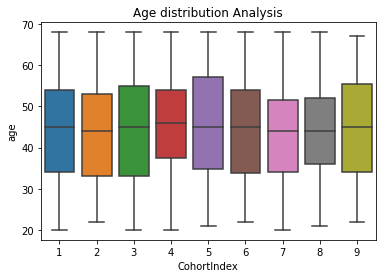

In [41]:
# Analyze the age for 2017-04
customerdata_2017_4 = clear_data[clear_data['CohortMonth']=='2017-04']
sns.boxplot(x='CohortIndex', y = 'age', data= customerdata_2017_4)
plt.title('Age distribution Analysis')

Text(0.5, 1.0, "Past 3 years' bike related purchases")

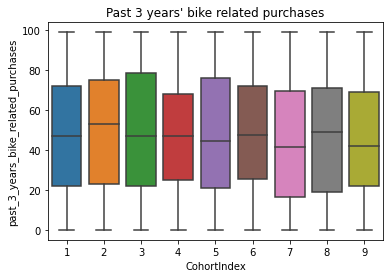

In [42]:
# Analyze the past_3_years_bike_related_purchases for 2017-04
customerdata_2017_4 = clear_data[clear_data['CohortMonth']=='2017-04']
sns.boxplot(x='CohortIndex', y = 'past_3_years_bike_related_purchases', data= customerdata_2017_4)
plt.title("Past 3 years' bike related purchases")